# Real would image classification

This scipts classifies a real world images using a pretrained network called VGG16. First load a nececcary modules. Here we use the high-level neural networks API which works on top of tensorflow.

In [1]:
#import keras
import tensorflow.keras as keras # (use this line istead if you don't have keras but do have Tensorflow v1.10+)
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)

AttributeError: module 'tensorflow' has no attribute 'logging'

Load the network and all its pretrained parameters and print a summary of the network architecture



In [9]:
# load the model
model = keras.applications.Xception()
print(model.summary())

91889664/91884032 [==============================] - 10s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
_________________________

Import an image stored locally on your computer that you want to classify

In [19]:
# Uncomment these lines if you run via Google Colaboratory
#from google.colab import files
#uploaded = files.upload()
#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))
fn = 'milk2.jpg'

Do the preprocessing and prediction of the image

In [20]:
# load an image from file
image = keras.preprocessing.image.load_img(fn, target_size=(299, 299))
# convert the image pixels to a numpy array
image_array = keras.preprocessing.image.img_to_array(image)
# reshape data for the model
image_reshape = image_array.reshape((1, image_array.shape[0], image_array.shape[1], image_array.shape[2]))
# prepare the image for the VGG model
image_preprocess = keras.applications.xception.preprocess_input(image_reshape)
# predict the probability across all output classes
yhat = model.predict(image_preprocess)
# convert the probabilities to class labels
label = keras.applications.xception.decode_predictions(yhat)

Plot the image and present the most likely labels

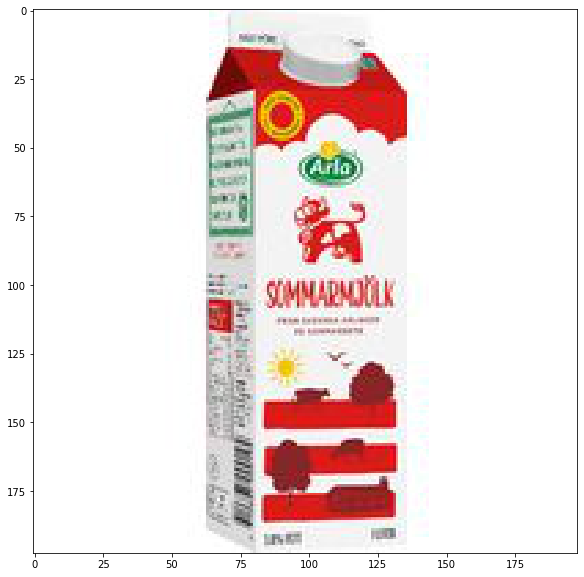

Band_Aid (51.49%)
sunscreen (15.59%)
nipple (7.05%)
packet (5.87%)
lotion (2.79%)


In [21]:
# plot the image
%matplotlib inline  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(fn)
plt.figure(figsize = (20,10))
plt.imshow(img,interpolation='nearest')
plt.show()

# print the classification
for i in range(0,len(label[0])):
    print('%s (%.2f%%)' % (label[0][i][1], label[0][i][2]*100))